Loaded Per-Component Losses: [[24.75784    27.463768  ]
 [16.299269   14.589951  ]
 [10.26456     8.818134  ]
 [ 6.349112    6.034465  ]
 [ 4.0017653   4.5374336 ]
 [ 2.731188    3.6504874 ]
 [ 2.1592207   3.0823016 ]
 [ 2.008237    2.6936674 ]
 [ 2.0774632   2.4127953 ]
 [ 2.2266884   2.19625   ]
 [ 2.3659043   2.0164046 ]
 [ 2.4472518   1.8576679 ]
 [ 2.453094    1.7126933 ]
 [ 2.3856637   1.5777212 ]
 [ 2.258008    1.4513484 ]
 [ 2.0879529   1.3342093 ]
 [ 1.8937243   1.2268153 ]
 [ 1.6917977   1.1302208 ]
 [ 1.4952998   1.0446184 ]
 [ 1.3139448   0.96987814]
 [ 1.1540256   0.90525985]
 [ 1.0189264   0.8500318 ]
 [ 0.9097938   0.8033384 ]
 [ 0.82587427  0.7638574 ]
 [ 0.7649274   0.7306394 ]
 [ 0.72400975  0.70242107]
 [ 0.69965804  0.6781403 ]
 [ 0.6883042   0.65711284]
 [ 0.68647176  0.6388247 ]
 [ 0.690892    0.6227561 ]]


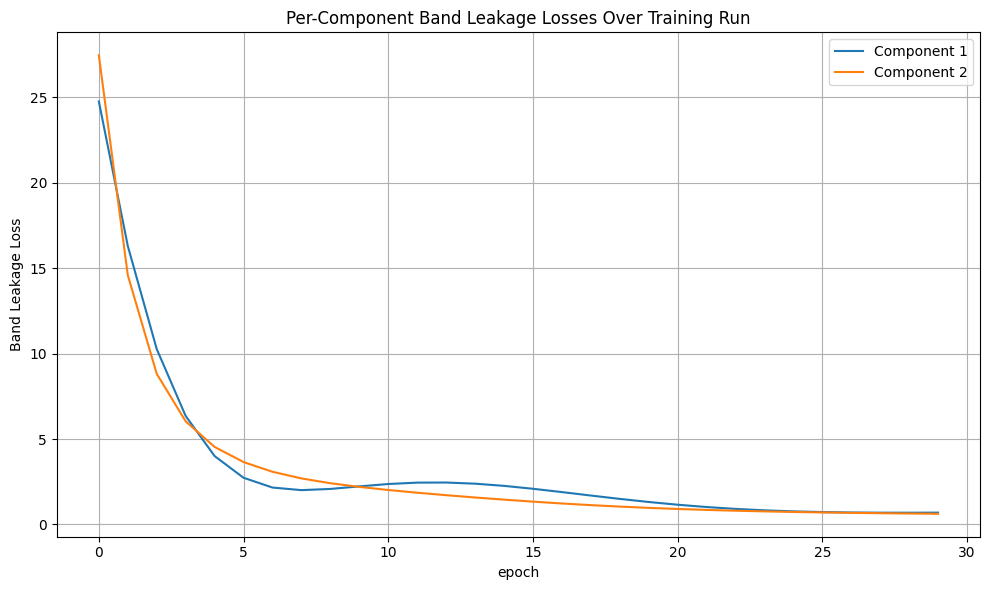

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the path to the saved .npz file
file_path = '/Users/kaspervanderhorst/Desktop/thesis/src/losses/band_leakage_loss_data/training_run_losses.npz'

# Load the data from the .npz file
data = np.load(file_path)

# Extract the per-component losses
training_run_losses = data['training_run_losses']

# Print the loaded data
print("Loaded Per-Component Losses:", training_run_losses)

# Plot the per-component losses for the training run
plt.figure(figsize=(10, 6))
for i, component_losses in enumerate(training_run_losses.T):
    plt.plot(component_losses, label=f'Component {i+1}')

plt.title('Per-Component Band Leakage Losses Over Training Run')
plt.xlabel('epoch')
plt.ylabel('Band Leakage Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()